IMPORTING REQUIRED LIBRARIES

In [45]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
train = pd.read_csv("train.csv")

In [50]:
test = pd.read_csv("test.csv")

#Viewing data and different features


In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train.shape

In [52]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

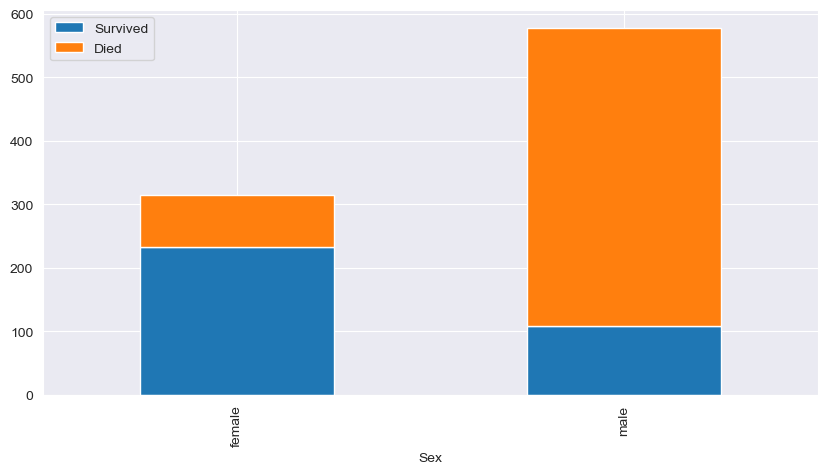

In [54]:
#visualizing survivals based on gender
train["Died"] = 1 - train["Survived"]
train.groupby("Sex").agg("sum")[["Survived","Died"]].plot(kind="bar",figsize=(10,5),stacked=True)

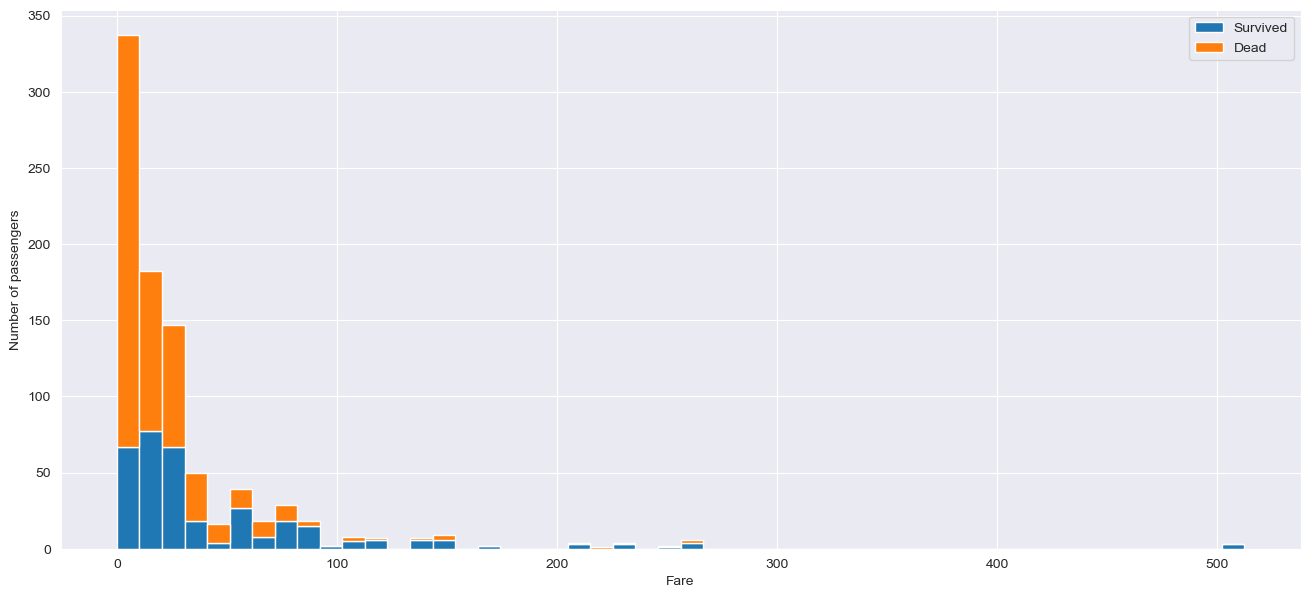

In [55]:
#Visualizing survivals based on fare
figure = plt.figure(figsize=(16,7))
plt.hist([train[train["Survived"] == 1]["Fare"],train[train["Survived"] == 0]["Fare"]],stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel("Fare")
plt.ylabel("Number of passengers")
plt.legend()

Processing training data


In [56]:
#Cleaning the data by removing irrelevant columns
df1 = train.drop(["Name","Ticket","Cabin","PassengerId","Died"],axis=1)
df1.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S
96,0,1,male,71.0,0,0,34.6542,C
97,1,1,male,23.0,0,1,63.3583,C
98,1,2,female,34.0,0,1,23.0000,S


In [57]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [58]:
#converting the categorical features "sex" and "Embarked" into numerical values 0 and 1
df1.Sex = df1.Sex.map({"female":0,"male":1})
df1.Embarked=df1.Embarked.map({"S":0,"C":1,"Q":2,"nan":"NaN"})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [59]:
#mean age of each sex
mean_age_men = df1[df1["Sex"]==1]["Age"].mean()
mean_age_women = df1[df1["Sex"]==0]["Age"].mean()

In [60]:
#Filling all the null values in 'Age' with respective mean age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=mean_age_men

In [61]:
#let's check for the Null values again now
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [62]:
#since there exist 2 null values in the embarked column, let's drop thhose rows containing null values
df1.dropna(inplace=True)

In [63]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [64]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


Creating model


In [65]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived)

Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

0.8426966292134831

<Axes: >

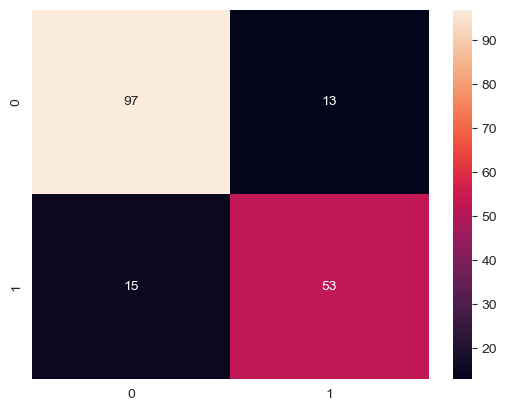

In [67]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

Processing test data

In [68]:
#Viewing test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
#Cleaning the data by removing irrelevant columns
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [70]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [71]:
#Let's check for the null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [72]:
#Finding mean age
mean_age_men2=df2[df2['Sex']==1]['Age'].mean()
mean_age_women2=df2[df2['Sex']==0]['Age'].mean()

In [73]:
#Filling all the null values in 'Age' and 'Fare' with respective mean age and mean fare
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=mean_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=mean_age_men2
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [74]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))
df2.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540
std,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


Prediction

In [76]:
prediction = lrmod.predict(df2)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                           "Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [79]:
prediction_df = pd.read_csv('submission.csv')

<Axes: xlabel='Survived', ylabel='count'>

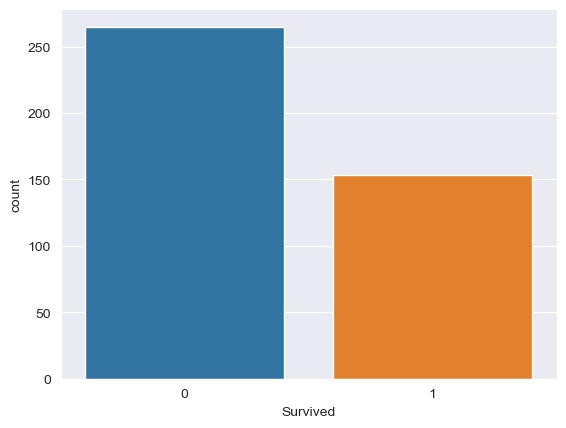

In [80]:
sns.countplot(x='Survived', data=prediction_df)

In [81]:
sns.countplot(x='Survived', data=prediction_df)sns.countplot(x='Survived', data=prediction_df)

SyntaxError: invalid syntax (725749231.py, line 1)